In [3]:
!pip install pydicom

##Introduction
이번 시간에는 Dicom 이미지를 읽어보고 이론시간에 배웠던 Meta 데이터를 읽어보고 사용하는 단계를 가져봅니다.  \\
우선적으로 Dicom의 예시 파일들의 경로를 읽어옵니다.

이번 실습에서는 pneumothorax(기흉)의 이미지를 읽어보고
brain tumor에 대해서 읽어보여 GIF로 보는 것 까지 해보도록 하겠습니다.
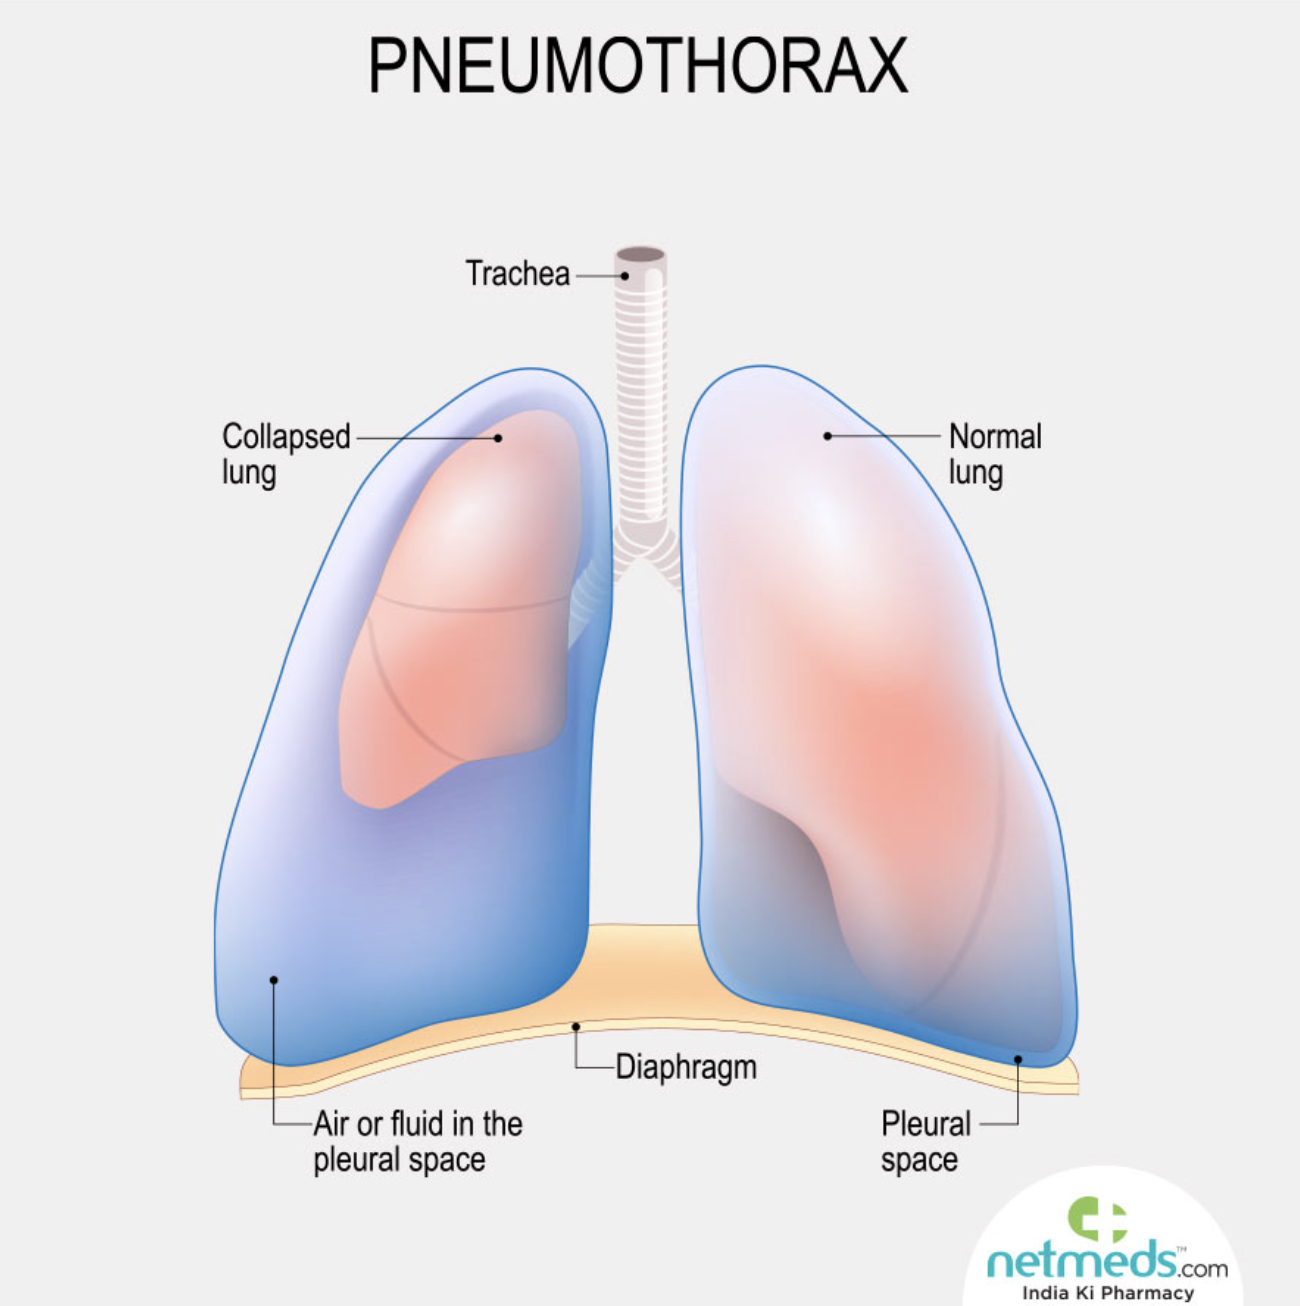

In [4]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from pydicom.data import get_testdata_file
import logging
import sys

In [6]:
BASE_PATH = '/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test'
SAMPLE_IMAGE_PATH = list(Path(BASE_PATH).glob('*'))
dicom_img_list = SAMPLE_IMAGE_PATH

In [14]:
SAMPLE_IMAGE_PATH

[PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5824.1517875191.323605'),
 PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5881.1517875192.113344'),
 PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5977.1517875193.416168'),
 PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.6129.1517875196.661886'),
 PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.622.1517875163.738839'),
 PosixPath('/home/min

In [16]:
dicom_img_list = []
for i in SAMPLE_IMAGE_PATH:
    files = list(i.glob('*/*.dcm'))
    if files: 
        dicom_img_list.append(files[0])
    else:
        dicom_img_list.append(None)

In [21]:
dicom_img_list

[PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5824.1517875191.323605/1.2.276.0.7230010.3.1.3.8323329.5824.1517875191.323604/1.2.276.0.7230010.3.1.4.8323329.5824.1517875191.323606.dcm'),
 PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5881.1517875192.113344/1.2.276.0.7230010.3.1.3.8323329.5881.1517875192.113343/1.2.276.0.7230010.3.1.4.8323329.5881.1517875192.113345.dcm'),
 PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5977.1517875193.416168/1.2.276.0.7230010.3.1.3.8323329.5977.1517875193.416167/1.2.276.0.7230010.3.1.4.8323329.5977.1517875193.416169.dcm'),
 PosixPath('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습

Meta Data 읽어오기

In [22]:
number_img = 0 

dcom_img = pydicom.dcmread(dicom_img_list[number_img], force=True)

In [23]:
dcom_img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.5824.1517875191.323606
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.5824.1517875191.323606
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

# 이미지 Meta data 의미


* Rows -> 이미지의 Height
* Columns -> 이미지의 width
* SOPInstanceUID -> Unique identifier로써 slice number과 같이 포함되어있다.
* ContentDate -> pixel data가 만들어진 시간을 말한다.
* SliceThickness -> 이미지의 실제 pixel과 Pixel사이의 길이를 의미한다.
* InstanceNumber -> 이미지의 장수를 의미한다. slice number.


In [24]:
def show_dcm_info(dataset):
    print("Filename.........:", dicom_img_list[number_img])
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", dataset.get("PatientID"))
    print("Patient's Age.......:", dataset.get("PatientAge"))
    print("Patient's Sex.......:", dataset.get("PatientSex"))
    print("Modality............:", dataset.get("Modality"))
    print("Body Part Examined..:", dataset.get("BodyPartExamined"))
    print("View Position.......:", dataset.get("ViewPosition"))
    print("Image position......:", dataset.get("ImagePositionPatient"))

    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

def plot_pixel_array(dataset, figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()

Filename.........: /home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5824.1517875191.323605/1.2.276.0.7230010.3.1.3.8323329.5824.1517875191.323604/1.2.276.0.7230010.3.1.4.8323329.5824.1517875191.323606.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 29ce462c-a76f-4286-8394-0f0e0cc6ae1d, 
Patient id..........: 29ce462c-a76f-4286-8394-0f0e0cc6ae1d
Patient's Age.......: 37
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: PA
Image position......: None
Image size.......: 1024 x 1024, 110936 bytes
Pixel spacing....: [0.168, 0.168]


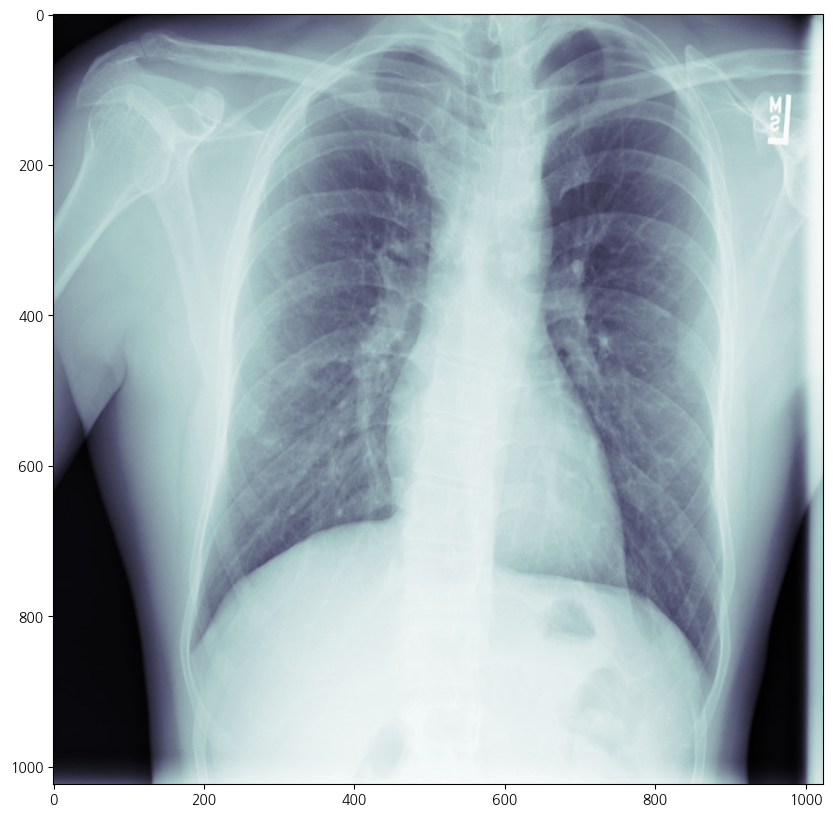

In [25]:
show_dcm_info(dcom_img)
plot_pixel_array(dcom_img)

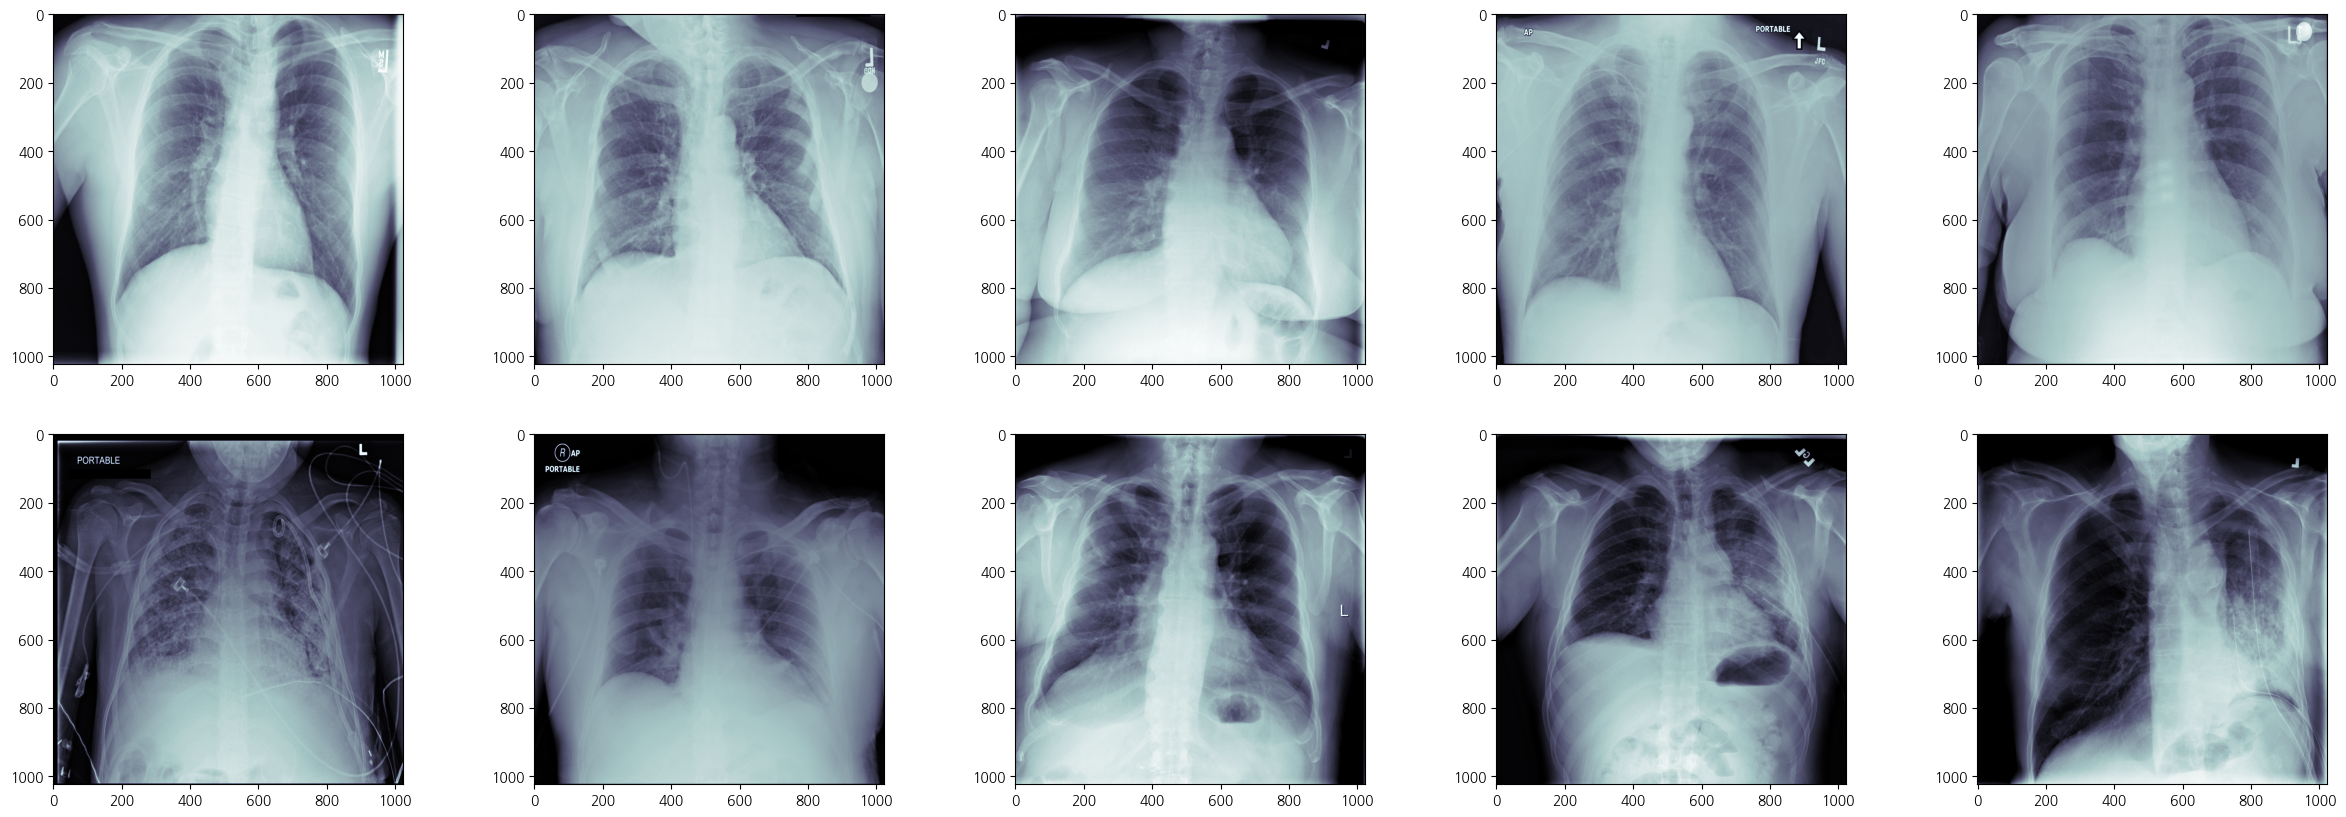

In [26]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

for idx,ax in zip(range(10),axs.flatten()):
    dcm_img = pydicom.read_file(dicom_img_list[idx]) # read dicom image
    img = dcm_img.pixel_array # get image array
    ax.imshow(img, cmap='bone')

## 3차원 이미지 영상
X-ray로 찍은 이미지외에 brain이미지를 이미지로 읽어보는 실습도 가져보도록 하겠습니다. \\

이에 활용에 유용한 scikit-image를 설치하도록 하겠습니다.

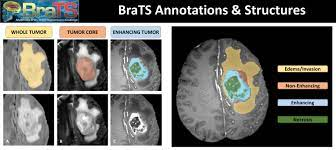

In [28]:
!pip install scikit-image
!pip install natsort

In [29]:
from skimage.util import montage
from natsort import natsorted

In [30]:
BASE_PATH = Path('/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/brain_images/00825/T2w')
dicom_images = natsorted(list(BASE_PATH.glob('*.dcm')))
print(f'number of dicom images : {len(dicom_images)}')

number of dicom images : 29


In [31]:
concat_images = np.array([pydicom.read_file(i).pixel_array for i in dicom_images])

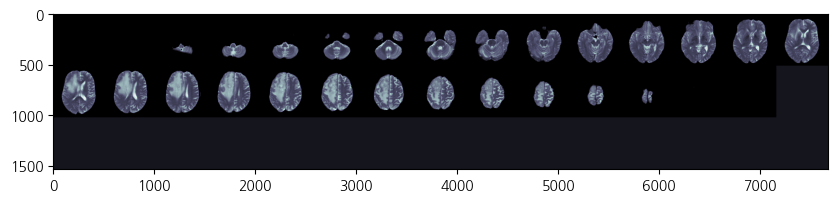

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(montage(concat_images, grid_shape=(3,15)),cmap='bone')

## NIFITI file load example
* nifit file을 읽기 위해서 dicom을 nifiti로 바꿔봅시다. \\
* 우선적으로 dicom2nifti를 이용해서 dicom을 nifitif로 변형하고
* niblbe로 nifiti파일을 읽어옵니다.

In [33]:
!pip install nibabel
!pip install dicom2nifti

In [34]:
import dicom2nifti
import nibabel as nib

dicom2nifti.convert_directory("/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/brain_images/00825/T2w", "./")
nifiti_path = './8_t2w.nii.gz'

In [35]:
# nifti file load
sample_img = nib.load(nifiti_path)
sample_img = np.asanyarray(sample_img.dataobj)

In [36]:
print(f'nifit file shape(height, width, depth) : {sample_img.shape}')

nifit file shape(height, width, depth) : (512, 512, 29)


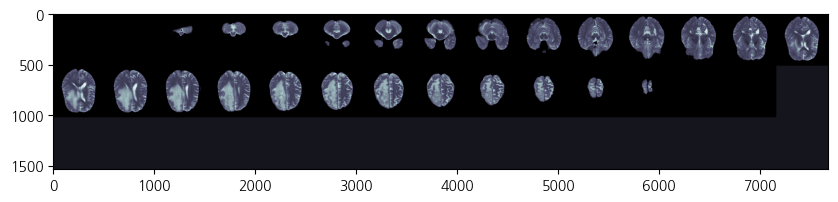

In [37]:
# plot 3d image use motage library
transpose_img = sample_img.transpose((2,1,0))
plt.figure(figsize=(10,10))
plt.imshow(montage(transpose_img, grid_shape=(3,15)),cmap='bone')

3d 로 만들게 되어지면 위치가 돌려서 전처리나 input을 다양하게 넣기에 좋아집니다.
* 이를 3d로 읽어오기 위해서 GIF로 만들어봅시다.

In [38]:
dicom2nifti.convert_directory("/home/minyoungxi/MINYOUNGXI/Medical/data/실습 자료/CH01, 03 실습/CH01_실습/Fastcampus/brain_images/00825/T2w", "./")
nifiti_path = './8_t2w.nii.gz'

In [39]:
# nifti file load
sample_img = nib.load(nifiti_path)
sample_img = np.asanyarray(sample_img.dataobj)
print(f'nifit file shape(height, width, depth) : {sample_img.shape}')
# plot 3d image use motage library
transpose_img = sample_img.transpose((2,1,0))

nifit file shape(height, width, depth) : (512, 512, 29)


In [44]:
from IPython.display import Image as show_gif
import matplotlib.animation as anim

class ImageToGIF:
    def __init__(self,
                 size=(500, 500),
                 xy_text=(80, 30),
                 dpi=200,
                 cmap='CMRmap'):

        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / dpi, size[1] / dpi)
        self.xy_text = xy_text
        self.cmap = cmap

        self.ax = self.fig.add_axes([0, 0, 1, 1])
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.images = []

    def add(self, image, label, with_mask=False):
        plt.set_cmap(self.cmap)
        plt_img = self.ax.imshow(image, animated=True)
        plt_text = self.ax.text(*self.xy_text, label, color='red')
        to_plot = [plt_img, plt_text]
        self.images.append(to_plot)
        plt.close()

    def save(self, filename, fps):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemagick', fps=fps)

MovieWriter imagemagick unavailable; using Pillow instead.


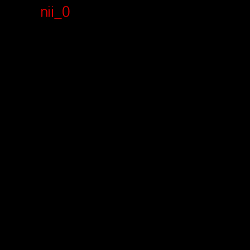

In [45]:
sample_data_gif = ImageToGIF()
label = nifiti_path.replace('/', '.').split('.')[-2]
filename = f'{label}_3d_2d.gif'

for i in range(transpose_img.shape[0]):
    image = transpose_img[i]
    sample_data_gif.add(image,label=f'{label}_{str(i)}')

sample_data_gif.save(filename, fps=15)
show_gif(filename, format='png')

In [46]:
transpose_img.shape

(29, 512, 512)

MovieWriter imagemagick unavailable; using Pillow instead.


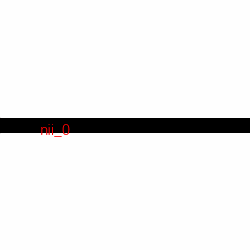

In [47]:
sample_data_gif = ImageToGIF()
label = nifiti_path.replace('/', '.').split('.')[-2]
filename = f'{label}_3d_2d.gif'

for i in range(transpose_img.shape[2]):
    image = np.rot90(transpose_img[...,i], k=2, axes=(1,0))
    sample_data_gif.add(image,label=f'{label}_{str(i)}')

sample_data_gif.save(filename, fps=15)
show_gif(filename, format='png')
